# Data Preperation 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [3]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [4]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [6]:
def set_header_font():
    return[dict(selector='th', props=[('font-size', '14pt')])]
df.describe(percentiles=[.01,.99]).transpose().style.format('{:.2f}').\
    set_properties(**{'font-size': '14pt'}).set_table_styles(set_header_font())

,count,mean,std,min,1%,50%,99%,max
CustomerID,64374.00,32187.50,18583.32,1.00,644.73,32187.50,63730.27,64374.00
Age,64374.00,41.97,13.92,18.00,18.00,42.00,65.00,65.00
Tenure,64374.00,31.99,17.10,1.00,1.00,33.00,60.00,60.00
Usage Frequency,64374.00,15.08,8.82,1.00,1.00,15.00,30.00,30.00
Support Calls,64374.00,5.40,3.11,0.00,0.00,6.00,10.00,10.00
Payment Delay,64374.00,17.13,8.85,0.00,0.00,19.00,30.00,30.00
Total Spend,64374.00,541.02,260.87,100.00,109.00,534.00,990.00,1000.00
Last Interaction,64374.00,15.50,8.64,1.00,1.00,15.00,30.00,30.00
Churn,64374.00,0.47,0.50,0.00,0.00,0.00,1.00,1.00


In [7]:
# checking for null values
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
# Drop unnecessary columns 
df.drop(columns= 'CustomerID')

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


# Visualization 

C:\Users\oluwa\AppData\Local\Temp\ipykernel_16704\1661189981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn'] == 0]['Age'], hist=False, color="blue")
C:\Users\oluwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oluwa\AppData\Local\Temp\ipykernel_16704\1661189981.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot`

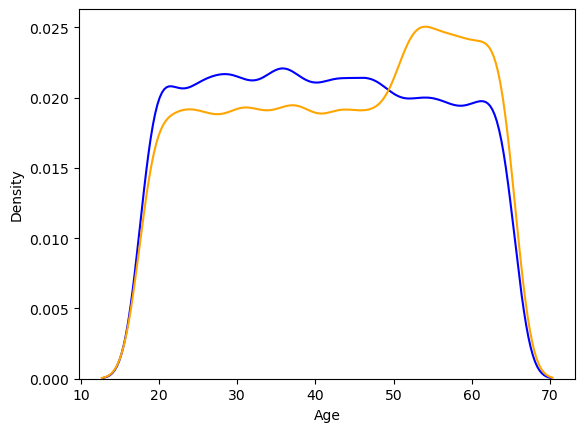

In [9]:
sns.distplot(df[df['Churn'] == 0]['Age'], hist=False, color="blue") 
sns.distplot(df[df['Churn'] == 1]['Age'], hist=False, color="orange")
plt.show()

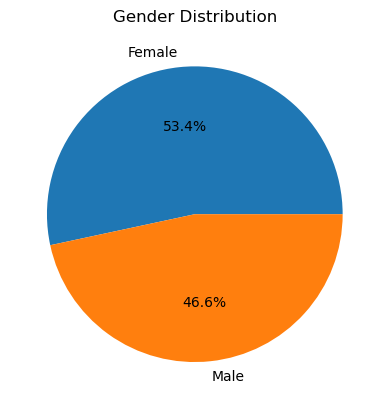

In [10]:
# Gender distribution 
gender_distribution = df['Gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

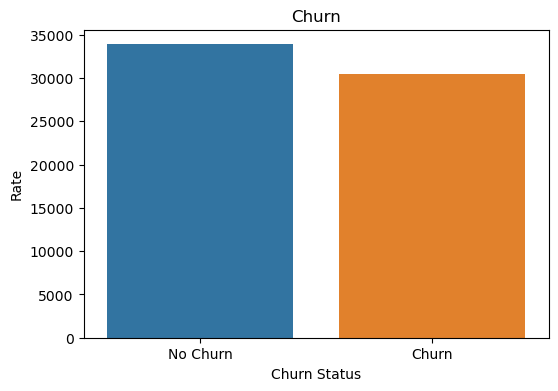

In [11]:
# Rates of churn
churn_rate = df['Churn'].value_counts()

# Plotting 
plt.figure(figsize=(6,4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn')
plt.xlabel('Churn Status')
plt.ylabel('Rate')
plt.xticks(ticks=[0,1], labels=['No Churn', 'Churn'])
plt.show()

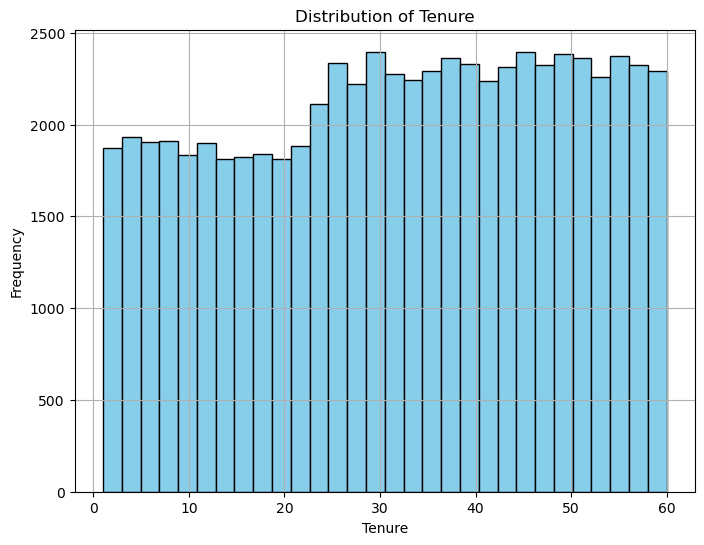

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

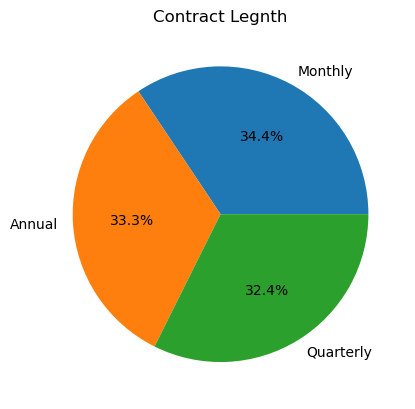

In [13]:
gender_distribution = df['Contract Length'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Contract Legnth')
plt.show()

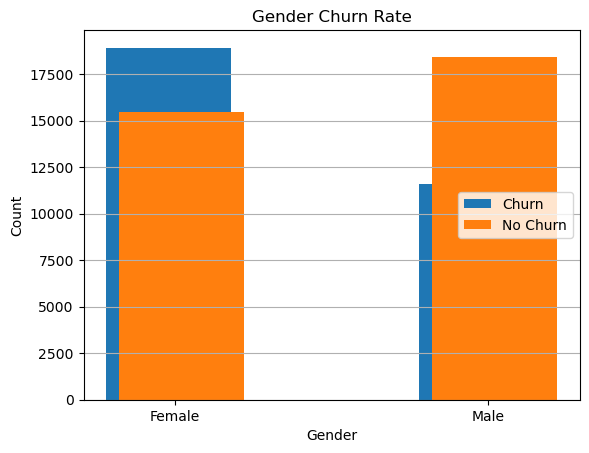

In [14]:
# Identifying wheather gender affects churn rates 

gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()
X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:,0])
churn_1 = list(gender_churn.iloc[:,1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.02, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.02, churn_0, 0.4, label = 'No Churn')

plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Churn Rate')
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# Feature Selection

In [15]:
# Splitting dataset in features and target variables 
feature = ['Age','Usage Frequency', 'Subscription Type', 'Contract Length', 'Total Spend']

X = df[feature]
y = df['Churn']

print (X,y)

       Age  Usage Frequency Subscription Type Contract Length  Total Spend
0       22               14             Basic         Monthly          598
1       41               28          Standard         Monthly          584
2       47               10           Premium          Annual          757
3       35               12           Premium       Quarterly          232
4       53               24          Standard          Annual          533
...    ...              ...               ...             ...          ...
64369   45               12             Basic       Quarterly          947
64370   37                1          Standard          Annual          923
64371   25               14           Premium         Monthly          327
64372   50               19          Standard         Monthly          540
64373   52               15          Standard         Monthly          696

[64374 rows x 5 columns] 0        1
1        0
2        0
3        0
4        0
        ..
64369   

In [16]:
# Creating mapping dictionary to change to corressponding number 
subscription_type = {'Basic': 1, 'Standard': 2, 'Premium': 3}
df['Subscription Type'] = df['Subscription Type'].map(subscription_type)

In [17]:
# Creating mapping dictionary to change to corressponding number 
contract_length = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df['Contract Length'] = df['Contract Length'].map(contract_length)

# Splitting Data

In [22]:
from sklearn.model_selection import train_test_split  # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64374, 5), (64374,), (45061, 5), (19313, 5), (45061,), (19313,))

# Random Forest

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    X.iloc[:, X.columns.get_loc(col)] = label_encoders[col].fit_transform(X[col])

In [24]:
from sklearn import metrics

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

In [25]:
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.56


In [26]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60     10171
           1       0.54      0.47      0.50      9142

    accuracy                           0.56     19313
   macro avg       0.55      0.55      0.55     19313
weighted avg       0.55      0.56      0.55     19313



In [27]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

# https://github.com/oluwakemih/dataprepCA1.git